Познакомимся с библиотекой requests, решив простую задачу — получить значения курсов валют. Курс валют — полезная и регулярно обновляемая информация, но каждый раз в ручном режиме получать информацию о курсе интересующей валюты трудоёмко.

## Разработаем код, так называемый скрипт (англ. script, рус. сценарий), — небольшую программу, которая содержит последовательность действий для автоматического выполнения задачи

С помощью скрипта мы будем в удобном виде выгружать информацию по курсам валют с заранее выбранного сайта.

Один из сайтов в интернете, на котором информация о курсах валют дублирует информацию с сайта [Центрального Банка России](https://www.cbr.ru/), — ресурс [Курсы валют ЦБ РФ в XML и JSON](https://www.cbr-xml-daily.ru/). На данном ресурсе информация о курсах валют представлена в разных форматах, в том числе и в структурированном JSON-формате, методы работы с которым мы изучили в одном из предыдущих модулей.

### Перед началом работы библиотеку requests потребуется установить. Например, в Jupyter Notebook это делается с помощью такой команды:

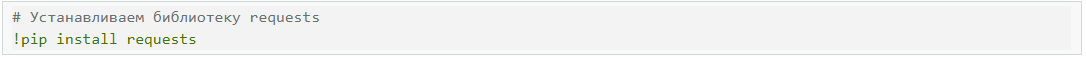

Как только библиотека установлена, импортируем её и отправим наш первый запрос к ресурсу [Курсы валют ЦБ РФ в XML и JSON](https://www.cbr-xml-daily.ru/). Используем метод get() из библиотеки requests, передав ему соответствующий URL —  https://www.cbr-xml-daily.ru/daily_json.js:

In [2]:
import requests # Импортируем библиотеку requests
url = 'https://www.cbr-xml-daily.ru/daily_json.js' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response

# Проверим ответ сервера — содержимое переменной response:

print(response)

<Response [200]>


Мы получили объект ответа Response, который содержит всю нужную нам информацию. По умолчанию в квадратных скобках на экран выводится код статуса ответа. В данном случае он равен 200 — то есть запрос был корректным и сервер отдал нам нужную информацию. Значение кода статуса 404 означало бы, что страница по указанному адресу не найдена, а значение 403 — что синтаксис GET-запроса неверный.

Код ответа в виде числовой переменной можно получить с помощью метода status_code:

In [3]:
print(response.status_code) # Выводим числовое значение response на экран

200


### Задание 3.1

Вы уже импортировали модуль requests в ваш код. Напишите строку кода, при выполнении которой будет сделан GET-запрос к ресурсу https://www.cbr-xml-daily.ru/daily.xml, а результат ответа будет сохранён в переменной response:

In [4]:
response = requests.get('https://www.cbr-xml-daily.ru/daily.xml')

<Response [200]>

## Работаем с ответом

Мы сделали запрос и получили корректный ответ (код статуса — 200). Дальнейшую работу производим с результатом запроса к ресурсу Курсы валют ЦБ РФ в XML и JSON.

Как получить доступ ко всей информации, которую содержит ответ?

Текст ответа хранится в атрибуте text. Выведем значение атрибута на экран и посмотрим на его содержимое:

In [5]:
print(response.text) # Выводим содержимое атрибута text переменной response на экран

{
    "Date": "2024-10-18T11:30:00+03:00",
    "PreviousDate": "2024-10-17T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2024\/10\/17\/daily_json.js",
    "Timestamp": "2024-10-18T13:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 65.0024,
            "Previous": 65.0745
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 57.1465,
            "Previous": 57.2099
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 126.3811,
            "Previous": 127.3481
 

### Как правило, при работе над реальным проектом на этапе получения данных мы уже понимаем, с какими форматами данных нам придётся работать. На предлагаемом для работы ресурсе информация есть как в JSON-формате, так и в XML. По нашему запросу ресурс возвращает информацию в JSON-формате, однако в настоящий момент результат хранится как единая строка. Проверить тип данных полученного ответа можно, воспользовавшись функцией type().

Для того чтобы удобно было работать с полученной информацией, нам необходимо преобразовать строку в словарь. В объект ответа Response  из библиотеки requests уже встроен метод json() .

Импортируем функцию pprint(), применим к полученному ответу метод json() и выведем полученный результат на экран:

In [6]:
from pprint import pprint # Импортируем функцию pprint()
import json # Импортируем модуль json
currencies = response.json() # Применяем метод json()
pprint(currencies) # Выводим результат на экран

{'Date': '2024-10-18T11:30:00+03:00',
 'PreviousDate': '2024-10-17T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2024/10/17/daily_json.js',
 'Timestamp': '2024-10-18T13:00:00+03:00',
 'Valute': {'AED': {'CharCode': 'AED',
                    'ID': 'R01230',
                    'Name': 'Дирхам ОАЭ',
                    'Nominal': 1,
                    'NumCode': '784',
                    'Previous': 26.4825,
                    'Value': 26.4531},
            'AMD': {'CharCode': 'AMD',
                    'ID': 'R01060',
                    'Name': 'Армянских драмов',
                    'Nominal': 100,
                    'NumCode': '051',
                    'Previous': 25.1128,
                    'Value': 25.0727},
            'AUD': {'CharCode': 'AUD',
                    'ID': 'R01010',
                    'Name': 'Австралийский доллар',
                    'Nominal': 1,
                    'NumCode': '036',
                    'Previous': 65.0745,
            

Теперь данные находятся в словаре и можно легко получать необходимые значения.

Например, по ключу Valute мы можем обратиться к вложенному словарю, который содержит информацию о мировых валютах. Выведем на экран, например, информацию о евро (EUR):

In [9]:
pprint(currencies['Valute']['EUR']) # Выводим на экран информацию о валюте евро

{'CharCode': 'EUR',
 'ID': 'R01239',
 'Name': 'Евро',
 'Nominal': 1,
 'NumCode': '978',
 'Previous': 106.0844,
 'Value': 105.756}


### Задание 3.2

Повторите запросы, описанные в этом юните, на своём компьютере. Что будет выведено на экран в результате выполнения следующего кода?

In [10]:
print(currencies['Valute']['CZK']['Name'])

Чешских крон
